In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from math import sqrt

In [134]:
df = pd.read_csv('data/data.csv', sep=';')
df = df.drop(columns=['Number', 'Closed_date', 'Merge_date', 'Diff_MergeLastModify', 'Create_date', 'Diff_CreateNow'])

print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             1107 non-null   object
 1   Nivel                 1107 non-null   object
 2   Imports               1107 non-null   int64 
 3   Changed_files         1107 non-null   int64 
 4   Changes               1107 non-null   int64 
 5   Deletion              1107 non-null   int64 
 6   Aditions              1107 non-null   int64 
 7   Size_body             1107 non-null   int64 
 8   PR_comments           1107 non-null   int64 
 9   PR_size_comments      1107 non-null   int64 
 10  Review_comments       1107 non-null   int64 
 11  Review_size_comments  1107 non-null   int64 
 12  Issue_comments        1107 non-null   int64 
 13  Issue_size_comments   1107 non-null   int64 
 14  Qtd_labels            1107 non-null   int64 
 15  Commits               1107 non-null   

,Situation,Nivel,Imports,Changed_files,Changes,Deletion,Aditions,Size_body,PR_comments,PR_size_comments,Review_comments,Review_size_comments,Issue_comments,Issue_size_comments,Qtd_labels,Commits
0,Open,Difficult,0,5,27,7,20,1100,8,1086,5,1086,7,1752,3,1
1,Open,Difficult,7,1,5,1,4,157,0,0,0,0,0,0,1,1
2,Open,Difficult,12,10,427,37,390,81,4,2598,8,2598,3,516,2,4
3,Open,Difficult,2,11,870,6,864,47,11,3886,14,3886,10,5529,3,3
4,Open,Difficult,1,15,106,46,60,334,5,0,0,0,3,525,2,4


In [135]:
# separar os dados em faceis/difíceis
dfEasy = df.loc[(df['Situation'] == 'Closed') & (df['Nivel'] == 'Easy')]
dfDifficult = df.loc[(df['Situation'] == 'Closed') & (df['Nivel'] == 'Difficult')]

In [136]:
y = dfEasy['Nivel']
X = dfEasy.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.043, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.044, shuffle=True)

dfTeste = pd.DataFrame(np.concatenate((dfDifficult.values, X_test), axis=0), columns=df.columns) 
dfValid =  pd.DataFrame(np.concatenate((dfDifficult.values, X_val), axis=0), columns=df.columns)
valid =  pd.DataFrame(X_val, columns=df.columns)
valid['Nivel'] = 'Easy valid'

dfAll = pd.DataFrame(np.concatenate((dfDifficult.values, X_test, valid.values), axis=0), columns=df.columns) 
dfAll.loc[dfAll['Nivel'] == 'Easy', 'Nivel'] = 'Easy Train'

len(X_train), len(X_test), len(X_val)

(890, 42, 42)

In [137]:
dfAll.groupby('Nivel').describe()

Situation                     Imports                  \
               count unique     top freq   count unique top freq   
Nivel                                                              
Difficult         42      1  Closed   42      42     10   0   26   
Easy Train        42      1  Closed   42      42      7   0   35   
Easy valid        42      1  Closed   42      42      7   0   35   

           Changed_files         ... Issue_size_comments      Qtd_labels  \
                   count unique  ...                 top freq      count   
Nivel                            ...                                       
Difficult             42     12  ...                 530    2         42   
Easy Train            42     10  ...                2041    1         42   
Easy valid            42     14  ...                1682    1         42   

                           Commits                  
           unique top freq   count unique top freq  
Nivel                                               
Difficult       7   1   16      42      8   1   22  
Easy Train      5   0   18      42      5   1   31  
Easy valid      5   0   21      42     12   1   24  

[3 rows x 60 columns]

Bloxpot para o atributo:  Imports


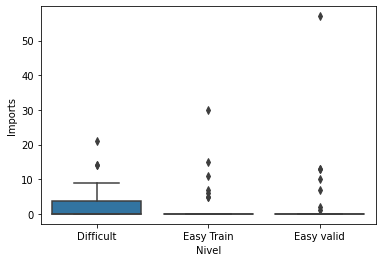

Dificil X Easy train:
p:  0.13454893305705834 
d:  0.14413479687897732

Dificil X Easy valid:
p:  0.11676488116097165 
d:  0.022736215409204424 

Bloxpot para o atributo:  Changed_files


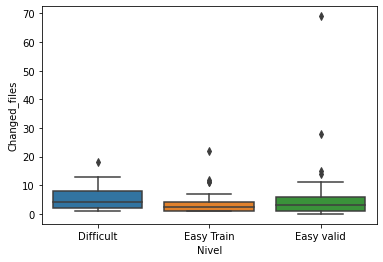

Dificil X Easy train:
p:  0.0354405776901442 
d:  0.3403217697145193

Dificil X Easy valid:
p:  0.11888246820005012 
d:  -0.08509051925818978 

Bloxpot para o atributo:  Changes


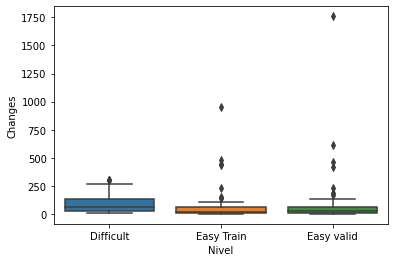

Dificil X Easy train:
p:  0.006924036105319397 
d:  0.03441570172663962

Dificil X Easy valid:
p:  0.010693803971646312 
d:  -0.09500608788916515 

Bloxpot para o atributo:  Deletion


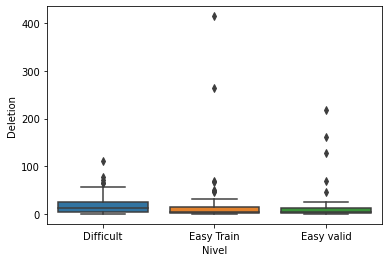

Dificil X Easy train:
p:  0.11676488116097165 
d:  -0.11515902279305162

Dificil X Easy valid:
p:  0.11467670959607837 
d:  0.018808738268993288 

Bloxpot para o atributo:  Aditions


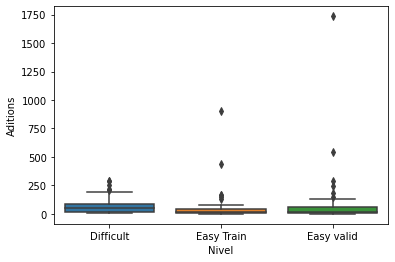

Dificil X Easy train:
p:  0.005525375349404331 
d:  0.09266244278874411

Dificil X Easy valid:
p:  0.012516336287520899 
d:  -0.10328372731581503 

Bloxpot para o atributo:  Size_body


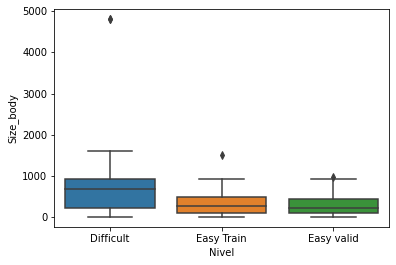

Dificil X Easy train:
p:  0.0011073265806692593 
d:  0.6467303868592182

Dificil X Easy valid:
p:  0.0003624533264903939 
d:  0.7021205226839454 

Bloxpot para o atributo:  PR_comments


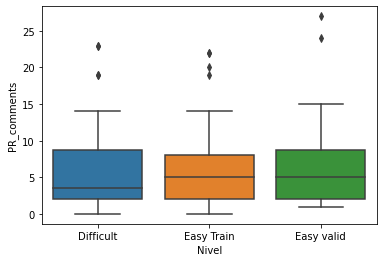

Dificil X Easy train:
p:  0.7052409121058483 
d:  -0.04407497833804133

Dificil X Easy valid:
p:  0.7385789473558421 
d:  -0.008011162441080272 

Bloxpot para o atributo:  PR_size_comments


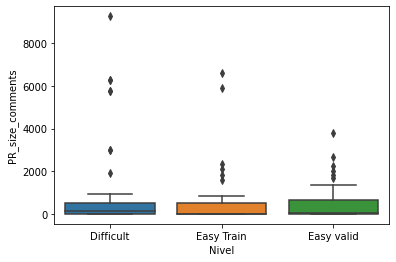

Dificil X Easy train:
p:  0.5478444775725548 
d:  0.25822604505578123

Dificil X Easy valid:
p:  0.5901632976614167 
d:  0.33861334733576665 

Bloxpot para o atributo:  Review_comments


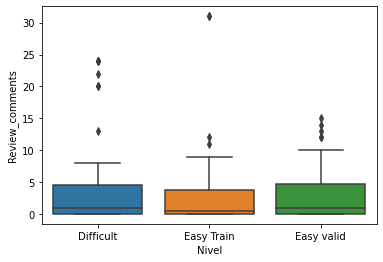

Dificil X Easy train:
p:  0.45705390386997696 
d:  0.23600774592014961

Dificil X Easy valid:
p:  0.5901632976614167 
d:  0.2788411466855231 

Bloxpot para o atributo:  Review_size_comments


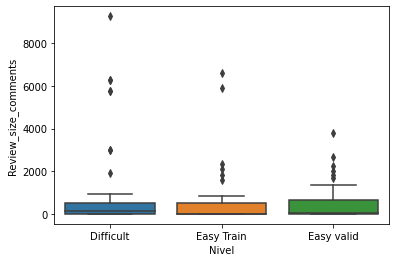

Dificil X Easy train:
p:  0.5478444775725548 
d:  0.25822604505578123

Dificil X Easy valid:
p:  0.5901632976614167 
d:  0.33861334733576665 

Bloxpot para o atributo:  Issue_comments


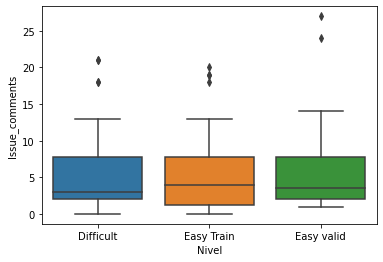

Dificil X Easy train:
p:  0.8066755522115383 
d:  -0.04284793228813011

Dificil X Easy valid:
p:  0.8204890567488865 
d:  -0.02065991374551593 

Bloxpot para o atributo:  Issue_size_comments


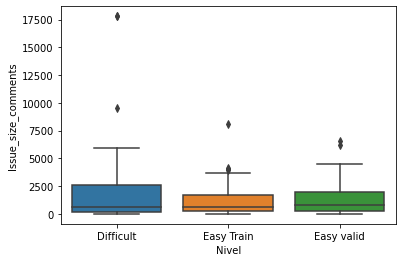

Dificil X Easy train:
p:  0.8973397472675184 
d:  0.32420704209428364

Dificil X Easy valid:
p:  0.8903025989135955 
d:  0.319753727665976 

Bloxpot para o atributo:  Qtd_labels


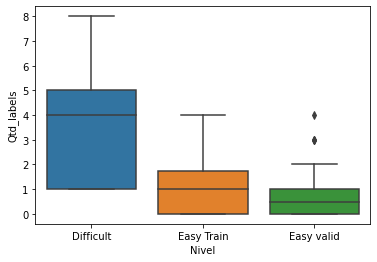

Dificil X Easy train:
p:  6.435052228258968e-08 
d:  1.3456983583900357

Dificil X Easy valid:
p:  6.288749662650114e-09 
d:  1.4447124075266713 

Bloxpot para o atributo:  Commits


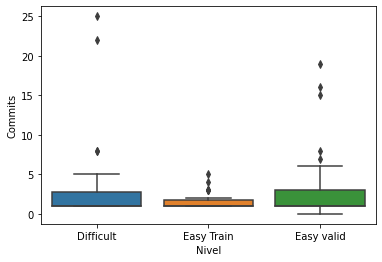

Dificil X Easy train:
p:  0.06581278158482756 
d:  0.4550382966998725

Dificil X Easy valid:
p:  0.7656075410167787 
d:  0.005177050569228348 



In [146]:
def cohend(d1, d2):
	n1, n2 = len(d1), len(d2)
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	u1, u2 = np.mean(d1), np.mean(d2)
	return (u1 - u2) / s

for column in dfAll.columns[2:]:
    print('Bloxpot para o atributo: ', column)
    sns.boxplot(data=dfAll, y=column, x='Nivel')
    plt.show()

    U1, p = mannwhitneyu(dfAll.loc[dfAll['Nivel'] == 'Difficult', column].values.tolist(), dfAll.loc[dfAll['Nivel'] == 'Easy Train', column].values.tolist(), method="exact")
    print('Dificil X Easy train:\np: ', p, '\nd: ', cohend(dfAll.loc[dfAll['Nivel'] == 'Difficult', column].values.tolist(), dfAll.loc[dfAll['Nivel'] == 'Easy Train', column].values.tolist()))

    U1, p = mannwhitneyu(dfAll.loc[dfAll['Nivel'] == 'Difficult', column].values.tolist(), dfAll.loc[dfAll['Nivel'] == 'Easy valid', column].values.tolist(), method="exact")
    print('\nDificil X Easy valid:\np: ', p, '\nd: ', cohend(dfAll.loc[dfAll['Nivel'] == 'Difficult', column].values.tolist(), dfAll.loc[dfAll['Nivel'] == 'Easy valid', column].values.tolist()), '\n')
